In [1]:
import pandas as pd
import numpy as np
import keras
import time

# Keras models and layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

# Sklearn Models and metrics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#For Visualization
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Development Environment (3.6.8 Anaconda)

In [2]:
print("Numpy version", np.__version__)
print("Pandas version", pd.__version__)
print("keras version", keras.__version__)
print("sklearn version", sklearn.__version__)
print("Matplotlib version", matplotlib.__version__)

Numpy version 1.18.5
Pandas version 1.0.5
keras version 2.3.1
sklearn version 0.23.1
Matplotlib version 3.2.2


In [3]:
def read_file(f):
    f = open(f, "r")
    data = f.readlines()
    f.close()
    return data

In [4]:
def validation_scores(X_test, y_test, model, isDNN=True):
    #loss, accuracy = model.evaluate(X_test, y_test)
    #print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
    expected = y_test
    if isDNN:
        predicted = model.predict_classes(X_test)
    else:
        predicted = model.predict(X_test)
    accuracy = accuracy_score(expected, predicted)
    precision = precision_score(expected, predicted, zero_division=1)
    recall = recall_score(expected, predicted, average="binary", zero_division=1)
    f1 = f1_score(expected, predicted , average="binary", zero_division=1)
    
    print("accuracy", "%.3f" %accuracy)
    print("precision", "%.3f" %precision)
    print("recall", "%.3f" %recall)
    print("f-score", "%.3f" %f1)
    print("Confusion Matrix")
    print(confusion_matrix(expected, predicted))
    return [accuracy, precision, recall, f1]

## Input Data

In [5]:
features = read_file('Permissions.Train.csv')
labels = pd.read_csv('Label.Train.csv', header=None)

## Tokenization and padding of Features

In [6]:
tk = Tokenizer(num_words=500,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', lower=True, split=" ")
tk.fit_on_texts(features)
X = tk.texts_to_sequences(features)
X = sequence.pad_sequences(X, maxlen=250, padding='post') # Only 250-element feature vector 

# ML Algorithmic Solutions

### Data preparation for ML model training

In [7]:
Y = np.array([i[0] for i in labels.values.tolist()])
Y = np.where(Y==-1, 0, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [8]:
start_time = time.time()
lg_model = LogisticRegression(max_iter=len(X_train))
lg_model.fit(X_train, y_train)
print("Training data accuracy", lg_model.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.7892545278137129
Model training took 2.715177059173584 seconds


In [9]:
lg_metrics = validation_scores(X_test, y_test, lg_model, isDNN=False)

accuracy 0.783
precision 0.417
recall 0.100
f-score 0.161
Confusion Matrix
[[4710  180]
 [1165  129]]


### Gaussian Naive Bayes

In [10]:
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training data accuracy", gnb.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.21114974126778785
Model training took 0.2613530158996582 seconds


In [11]:
gnb_metrics = validation_scores(X_test, y_test, gnb, isDNN=False)

accuracy 0.211
precision 0.209
recall 0.995
f-score 0.345
Confusion Matrix
[[  18 4872]
 [   7 1287]]


### Stochastic Gradient Descent

In [12]:
start_time = time.time()
# Always scale the input. The most convenient way is to use a pipeline.
sgd = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=len(X_train), tol=1e-3))
sgd.fit(X_train, y_train)
print("Training data accuracy", sgd.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.8009379042690815
Model training took 1.3520491123199463 seconds


In [13]:
sgd_metrics = validation_scores(X_test, y_test, sgd, isDNN=False)

accuracy 0.796
precision 0.531
recall 0.200
f-score 0.291
Confusion Matrix
[[4661  229]
 [1035  259]]


### Decision Trees

In [14]:
start_time = time.time()
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train, y_train)
print("Training data accuracy", dt.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.846822445019405
Model training took 0.16043591499328613 seconds


In [15]:
dt_metrics = validation_scores(X_test, y_test, dt, isDNN=False)

accuracy 0.842
precision 0.652
recall 0.519
f-score 0.578
Confusion Matrix
[[4532  358]
 [ 622  672]]


### Random Forest Classifier

In [16]:
start_time = time.time()
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
print("Training data accuracy", rfc.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.7916801423027167
Model training took 1.3161940574645996 seconds


In [17]:
rfc_metrics = validation_scores(X_test, y_test, rfc, isDNN=False)

accuracy 0.791
precision 1.000
recall 0.000
f-score 0.000
Confusion Matrix
[[4890    0]
 [1294    0]]


### Support Vector Machines

In [18]:
start_time = time.time()
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
print("Training data accuracy", svc.score(X_train, y_train))
print("Model training took {} seconds".format(time.time()-start_time))

Training data accuracy 0.8557163648124192
Model training took 197.08031105995178 seconds


In [19]:
svc_metrics = validation_scores(X_test, y_test, svc, isDNN=False)

accuracy 0.855
precision 0.741
recall 0.469
f-score 0.575
Confusion Matrix
[[4678  212]
 [ 687  607]]


# Deep Learning Based Solutions

### Data preparation for DNN model training

In [20]:
X = np.array(X).reshape(len(X), 1, 250) #LSTM require data in (instances, time-steps, features)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
batch_size = 32

### 1 Layer LSTM Sequential Model

In [21]:
start_time = time.time()
lstm_1 = Sequential()
lstm_1.add(LSTM(units=10, activation='tanh', input_shape=(1,250))) #Experiment with different number of units
lstm_1.add(Dropout(0.1))
lstm_1.add(Dense(1, activation='sigmoid'))

lstm_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_1.fit(X_train, y_train, epochs=10, batch_size=32)
#lstm_1.save("logs/lstm_1_layer_model.hdf5") #Uncomment to save the model
print("Model training took {} seconds".format(time.time()-start_time))

Epoch 1/10
24736/24736 [==============================] - 2s 83us/step - loss: 0.4449 - accuracy: 0.8321
Epoch 2/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3721 - accuracy: 0.8555
Epoch 3/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3534 - accuracy: 0.8627
Epoch 4/10
24736/24736 [==============================] - 1s 58us/step - loss: 0.3413 - accuracy: 0.8680
Epoch 5/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3332 - accuracy: 0.8709
Epoch 6/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3288 - accuracy: 0.8725
Epoch 7/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3242 - accuracy: 0.8721
Epoch 8/10
24736/24736 [==============================] - 1s 57us/step - loss: 0.3204 - accuracy: 0.8750
Epoch 9/10
24736/24736 [==============================] - 1s 60us/step - loss: 0.3180 - accuracy: 0.8756
Epoch 10/10
24736/24736 [==============================

In [22]:
lstm_1_metrics = validation_scores(X_test, y_test, lstm_1, isDNN=True)

accuracy 0.882
precision 0.793
recall 0.588
f-score 0.675
Confusion Matrix
[[4691  199]
 [ 533  761]]


### 2 Layers LSTM Model

In [23]:
start_time = time.time()
lstm_2 = Sequential()
lstm_2.add(LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(1,250)))
lstm_2.add(Dropout(0.1))
lstm_2.add(LSTM(units=10, activation='tanh', return_sequences=False))  # experiment using a GRU or RNN
lstm_2.add(Dropout(0.1))
lstm_2.add(Dense(1, activation='sigmoid'))

lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_2.fit(X_train, y_train, epochs=10, batch_size=32)
#lstm_2.save("logs/lstm_2_layer_model.hdf5") #Uncomment to save the model in local machine
print("Model training took {} seconds".format(time.time()-start_time))

Epoch 1/10
24736/24736 [==============================] - 4s 150us/step - loss: 0.4205 - accuracy: 0.8438
Epoch 2/10
24736/24736 [==============================] - 2s 84us/step - loss: 0.3362 - accuracy: 0.8679
Epoch 3/10
24736/24736 [==============================] - 2s 86us/step - loss: 0.3191 - accuracy: 0.8752
Epoch 4/10
24736/24736 [==============================] - 2s 84us/step - loss: 0.3098 - accuracy: 0.8806
Epoch 5/10
24736/24736 [==============================] - 2s 84us/step - loss: 0.3036 - accuracy: 0.8819
Epoch 6/10
24736/24736 [==============================] - 2s 83us/step - loss: 0.3013 - accuracy: 0.8845
Epoch 7/10
24736/24736 [==============================] - 2s 84us/step - loss: 0.2984 - accuracy: 0.8858
Epoch 8/10
24736/24736 [==============================] - 2s 84us/step - loss: 0.2943 - accuracy: 0.8868
Epoch 9/10
24736/24736 [==============================] - 2s 82us/step - loss: 0.2916 - accuracy: 0.8874
Epoch 10/10
24736/24736 [=============================

In [24]:
lstm_2_metrics = validation_scores(X_test, y_test, lstm_2, isDNN=True)

accuracy 0.892
precision 0.803
recall 0.643
f-score 0.714
Confusion Matrix
[[4686  204]
 [ 462  832]]


### 3 Layers LSTM Model

In [25]:
start_time = time.time()
lstm_3 = Sequential()
lstm_3.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(1,250)))
lstm_3.add(Dropout(0.1))
lstm_3.add(LSTM(units=20, activation='tanh', return_sequences=True))  
lstm_3.add(Dropout(0.1))
lstm_3.add(LSTM(units=10, activation='tanh', return_sequences=False))  
lstm_3.add(Dropout(0.1))
lstm_3.add(Dense(1, activation='sigmoid'))

lstm_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_3.fit(X_train, y_train, epochs=10, batch_size=32)
#lstm_3.save("logs/lstm_3_layer_model.hdf5") #Uncomment to save the model
print("Model training took {} seconds".format(time.time()-start_time))

Epoch 1/10
24736/24736 [==============================] - 5s 191us/step - loss: 0.3995 - accuracy: 0.8520
Epoch 2/10
24736/24736 [==============================] - 3s 136us/step - loss: 0.3217 - accuracy: 0.8758
Epoch 3/10
24736/24736 [==============================] - 3s 140us/step - loss: 0.3049 - accuracy: 0.8829
Epoch 4/10
24736/24736 [==============================] - 3s 123us/step - loss: 0.2956 - accuracy: 0.8857
Epoch 5/10
24736/24736 [==============================] - 3s 121us/step - loss: 0.2892 - accuracy: 0.8892
Epoch 6/10
24736/24736 [==============================] - 3s 123us/step - loss: 0.2838 - accuracy: 0.8896
Epoch 7/10
24736/24736 [==============================] - 3s 124us/step - loss: 0.2791 - accuracy: 0.8935
Epoch 8/10
24736/24736 [==============================] - 3s 121us/step - loss: 0.2766 - accuracy: 0.8927
Epoch 9/10
24736/24736 [==============================] - 3s 121us/step - loss: 0.2734 - accuracy: 0.8933
Epoch 10/10
24736/24736 [=====================

In [26]:
lstm_3_metrics = validation_scores(X_test, y_test, lstm_3, isDNN=True)

accuracy 0.893
precision 0.818
recall 0.627
f-score 0.710
Confusion Matrix
[[4710  180]
 [ 483  811]]


### 4 Layers LSTM Model

In [27]:
start_time = time.time()
lstm_4 = Sequential()
lstm_4.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(1,250)))
lstm_4.add(Dropout(0.1))
lstm_4.add(LSTM(units=50, activation='tanh', return_sequences=True))  
lstm_4.add(Dropout(0.1))
lstm_4.add(LSTM(units=20, activation='tanh', return_sequences=True))  
lstm_4.add(Dropout(0.1))
lstm_4.add(LSTM(units=10, activation='tanh', return_sequences=False))  
lstm_4.add(Dropout(0.1))
lstm_4.add(Dense(1, activation='sigmoid'))

lstm_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_4.fit(X_train, y_train, epochs=10, batch_size=32)
#lstm_4.save("logs/lstm_4_layer_model.hdf5") #Uncomment to save the model
print("Model training took {} seconds".format(time.time()-start_time))

Epoch 1/10
24736/24736 [==============================] - 6s 251us/step - loss: 0.3812 - accuracy: 0.8541
Epoch 2/10
24736/24736 [==============================] - 4s 170us/step - loss: 0.3131 - accuracy: 0.8814
Epoch 3/10
24736/24736 [==============================] - 4s 176us/step - loss: 0.2974 - accuracy: 0.8854
Epoch 4/10
24736/24736 [==============================] - 5s 189us/step - loss: 0.2873 - accuracy: 0.8892
Epoch 5/10
24736/24736 [==============================] - 4s 171us/step - loss: 0.2834 - accuracy: 0.8892
Epoch 6/10
24736/24736 [==============================] - 4s 173us/step - loss: 0.2755 - accuracy: 0.8921
Epoch 7/10
24736/24736 [==============================] - 4s 176us/step - loss: 0.2694 - accuracy: 0.8959
Epoch 8/10
24736/24736 [==============================] - 5s 184us/step - loss: 0.2660 - accuracy: 0.8966
Epoch 9/10
24736/24736 [==============================] - 4s 173us/step - loss: 0.2632 - accuracy: 0.8978
Epoch 10/10
24736/24736 [=====================

In [28]:
lstm_4_metrics = validation_scores(X_test, y_test, lstm_4, isDNN=True)

accuracy 0.896
precision 0.825
recall 0.636
f-score 0.718
Confusion Matrix
[[4716  174]
 [ 471  823]]


### 5 Layers LSTM Model

In [29]:
start_time = time.time()
lstm_5 = Sequential()
lstm_5.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(1,250)))
lstm_5.add(Dropout(0.1))
lstm_5.add(LSTM(units=100, activation='tanh', return_sequences=True))  
lstm_5.add(Dropout(0.1))
lstm_5.add(LSTM(units=50, activation='tanh', return_sequences=True))  
lstm_5.add(Dropout(0.1))
lstm_5.add(LSTM(units=20, activation='tanh', return_sequences=True))  
lstm_5.add(Dropout(0.1))
lstm_5.add(LSTM(units=10, activation='tanh', return_sequences=False))  
lstm_5.add(Dropout(0.1))
lstm_5.add(Dense(1, activation='sigmoid'))

lstm_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_5.fit(X_train, y_train, epochs=10, batch_size=32)
#lstm_5.save("logs/lstm_5_layer_model.hdf5") #Uncomment to save the model
print("Model training took {} seconds".format(time.time()-start_time))

Epoch 1/10
24736/24736 [==============================] - 9s 367us/step - loss: 0.4092 - accuracy: 0.8431
Epoch 2/10
24736/24736 [==============================] - 8s 313us/step - loss: 0.3315 - accuracy: 0.8746
Epoch 3/10
24736/24736 [==============================] - 8s 314us/step - loss: 0.3086 - accuracy: 0.8814
Epoch 4/10
24736/24736 [==============================] - 7s 283us/step - loss: 0.2950 - accuracy: 0.8870
Epoch 5/10
24736/24736 [==============================] - 7s 279us/step - loss: 0.2845 - accuracy: 0.8889
Epoch 6/10
24736/24736 [==============================] - 7s 289us/step - loss: 0.2790 - accuracy: 0.8921
Epoch 7/10
24736/24736 [==============================] - 7s 288us/step - loss: 0.2727 - accuracy: 0.8947
Epoch 8/10
24736/24736 [==============================] - 7s 279us/step - loss: 0.2693 - accuracy: 0.8947
Epoch 9/10
24736/24736 [==============================] - 7s 279us/step - loss: 0.2637 - accuracy: 0.8972
Epoch 10/10
24736/24736 [=====================

In [30]:
lstm_5_metrics = validation_scores(X_test, y_test, lstm_5, isDNN=True)

accuracy 0.899
precision 0.857
recall 0.619
f-score 0.719
Confusion Matrix
[[4756  134]
 [ 493  801]]


## Metrics Visualization

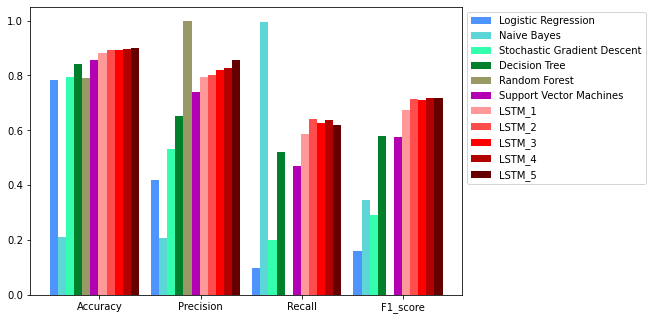

In [53]:
import matplotlib.pyplot as plt
data = [lg_metrics, gnb_metrics, sgd_metrics, dt_metrics, rfc_metrics, svc_metrics, 
        lstm_1_metrics, lstm_2_metrics, lstm_3_metrics, lstm_4_metrics, lstm_5_metrics]
lagends = ["Logistic Regression", "Naive Bayes", "Stochastic Gradient Descent", "Decision Tree", 
           "Random Forest", "Support Vector Machines", "LSTM_1", "LSTM_2", "LSTM_3", "LSTM_4", "LSTM_5"]

bar_width = 0.08
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X+0.45, ['Accuracy','Precision','Recall','F1_score'])
ax.bar(X + 0*(bar_width), data[0], color = '#4d94ff', width = bar_width)
ax.bar(X + 1*(bar_width), data[1], color = '#5cd6d6', width = bar_width)
ax.bar(X + 2*(bar_width), data[2], color = '#33ffad', width = bar_width)
ax.bar(X + 3*(bar_width), data[3], color = '#00802b', width = bar_width)
ax.bar(X + 4*(bar_width), data[4], color = '#999966', width = bar_width)
ax.bar(X + 5*(bar_width), data[5], color = '#b300b3', width = bar_width)
ax.bar(X + 6*(bar_width), data[6], color = '#ff9999', width = bar_width)
ax.bar(X + 7*(bar_width), data[7], color = '#ff4d4d', width = bar_width)
ax.bar(X + 8*(bar_width), data[8], color = '#ff0000', width = bar_width)
ax.bar(X + 9*(bar_width), data[9], color = '#b30000', width = bar_width)
ax.bar(X + 10*(bar_width), data[10], color = '#660000', width = bar_width)
plt.legend(lagends, bbox_to_anchor=(1, 1))